### 002271 东方雨虹

In [1]:
ticker = '002991'

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

In [3]:
baostock.login()
code = bu.get_bs_code(ticker)
mkt = bu.get_price_daily(code)
cap = bu.get_profit_data(code)
baostock.logout()

income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
bs = data.get_BS(ticker)
cf = data.get_CF(ticker)
div = data.get_DIV(ticker)

In [4]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
div_change = utils.column_pct(div.set_index('截止日期')[['分红']], periods=1)
pd.merge(income_change, div_change, how='left', on='截止日期').set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润,分红
截止日期,,,,,,
2021-12-31,1.65,1.65,"1,293,996,747 ( 10.4%)","1,126,212,863 ( 16.1%)","153,652,463 (-14.3%)",NaN
2020-12-31,2.25,2.25,"1,172,353,262 ( 5.7%)","970,139,010 ( 8.3%)","179,272,042 ( 6.7%)","69,911,873 (-29.9%)"
2019-12-31,2.40,2.40,"1,109,134,679 ( 21.7%)","895,580,104 ( 16.9%)","167,996,042 ( 40.1%)","99,740,939 ( nan%)"
2018-12-31,1.71,1.71,"911,410,000 ( 15.7%)","765,788,700 ( 8.3%)","119,879,400 ( 93.0%)",NaN
2017-12-31,0.91,0.91,"787,581,300 ( nan%)","707,211,100 ( nan%)","62,127,700 ( nan%)",NaN


In [5]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2022-03-31,"320,363,695 ( -5.2%)","22,512,920 (-45.3%)"
2021-12-31,"438,467,006 ( 15.8%)","76,377,987 ( 38.4%)"
2021-09-30,"311,759,828 ( 2.7%)","40,251,961 (-27.3%)"
2021-06-30,"205,853,258 (-16.6%)","-4,132,285 (-112.8%)"
2021-03-31,"337,916,655 ( 38.8%)","41,154,800 ( 12.5%)"
2020-12-31,"378,598,213 ( -1.9%)","55,176,462 (-15.8%)"
2020-09-30,"303,530,345 ( 10.6%)","55,331,313 ( 15.5%)"
2020-06-30,"246,846,819 ( 9.6%)","32,169,470 ( 54.9%)"
2020-03-31,"243,377,886 ( 8.8%)","36,594,797 ( 8.3%)"


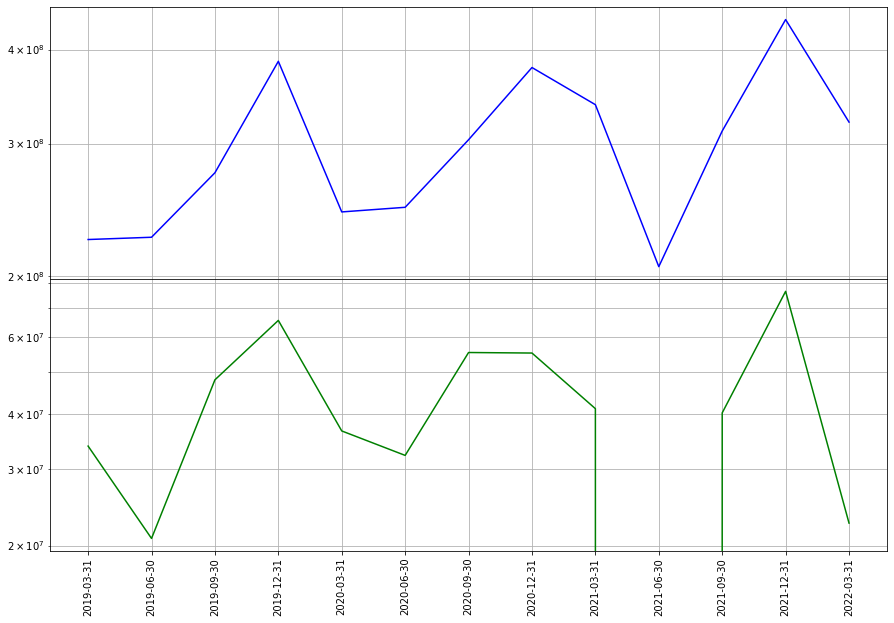

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [7]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2021-12-31,35.1,11.9
2020-12-31,40.1,15.3
2019-12-31,41.6,15.1
2018-12-31,40.6,13.2
2017-12-31,37.9,7.9


In [8]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2021-12-31,"1,293,996,747 ( 10.4%)","126,625,461 ( 42.5%)","96,519,145 ( 43.7%)","13,823,780 ( 60.4%)"
2020-12-31,"1,172,353,262 ( 5.7%)","88,883,896 ( -9.9%)","67,170,715 (-20.1%)","8,617,050 (-22.5%)"
2019-12-31,"1,109,134,679 ( 21.7%)","98,637,707 ( 36.8%)","84,102,449 ( 57.7%)","11,120,347 ( 40.2%)"
2018-12-31,"911,410,000 ( 15.7%)","72,111,500 ( -1.2%)","53,347,500 ( -1.1%)","7,932,600 ( 16.4%)"
2017-12-31,"787,581,300 ( nan%)","72,981,200 ( nan%)","53,915,600 ( nan%)","6,812,600 ( nan%)"


In [9]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])

NameError: name 'mkt' is not defined

In [ ]:
draw(mkt, 260, 200, 20)

In [ ]:
print("当前市值：", "{:,.0f}".format(float(cap.iloc[0]["总股本"]) * mkt.iloc[-1]["close"]))

In [ ]:
# 资产负债表
tmp = bs.drop(['股票代码'], axis=1)
tmp['截止日期'] = tmp['截止日期'].str[:4]
tmp = tmp.set_index('截止日期')

assets = ['货币资金', '存货', '应收账款', '流动资产合计', '固定资产', '非流动资产合计', '资产总计', '负债合计', '其他权益工具', '所有者权益合计']
liability = ['应付账款']

years = tmp.index
rows = []
new_index = []
for y in years:
    rows.append(y)
    rows.append(y + '_pct')
    new_index.append((y, 'value'))
    new_index.append((y, 'pct'))    
    tmp.loc[y + '_pct'] = tmp.loc[y]
    for a in assets:
        tmp.loc[y + '_pct'][a] = tmp.loc[y][a] / tmp.loc[y]['资产总计']
    for l in liability:
        tmp.loc[y + '_pct'][l] = tmp.loc[y][l] / tmp.loc[y]['负债合计']    

tmp = tmp.reindex(rows)
tmp = tmp.set_index(pd.MultiIndex.from_tuples(new_index)).T
for y in years:
    tmp[y, 'value'] = tmp[y, 'value'].map('{:,.0f}'.format)
    tmp[y, 'pct'] = tmp[y, 'pct'].map('{:,.2%}'.format)

display(tmp.iloc[:, :10])
display(tmp.iloc[:, 10:21])

In [ ]:
# 利润表
tmp = income.drop(['股票代码', '证券简称'], axis=1)
tmp['截止日期'] = tmp['截止日期'].str[:4]
tmp = tmp.set_index('截止日期')

tmp['费用'] = tmp['营业总成本'] - tmp['营业成本']
columns = ['营业收入', '营业成本', '费用', '利润总额', '归属于母公司所有者的净利润']
tmp = tmp[columns]
           

years = tmp.index
rows = []
new_index = []
for y in years:
    rows.append(y)
    rows.append(y + '_pct')
    new_index.append((y, 'value'))
    new_index.append((y, 'pct'))    
    tmp.loc[y + '_pct'] = tmp.loc[y] / tmp.loc[y, '营业收入']    

tmp = tmp.reindex(rows)
tmp = tmp.set_index(pd.MultiIndex.from_tuples(new_index)).T
for y in years:
    tmp[y, 'value'] = tmp[y, 'value'].map('{:,.0f}'.format)
    tmp[y, 'pct'] = tmp[y, 'pct'].map('{:,.2%}'.format)
    
display(tmp.iloc[:, :10])
display(tmp.iloc[:, 10:20])

In [ ]:
# 现金流量表
tmp = cf.drop(['股票代码'], axis=1)
tmp['截止日期'] = tmp['截止日期'].str[:4]
tmp = tmp.set_index('截止日期')

tmp = tmp.applymap('{:,.0f}'.format).T
    
display(tmp.iloc[:, :10])
display(tmp.iloc[:, 10:20])
